In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import re

In [0]:
#Importing the data

import io
train = pd.read_excel('Book_Train.xlsx')
test = pd.read_excel('Book_Test.xlsx')

In [0]:
print(train.shape)
print(test.shape)

(6237, 9)
(1560, 8)


In [0]:
train.head(3)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00


In [0]:
test.head(3)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance


In [0]:
# checking for missing or null values
train.isnull().sum()

Title           0
Author          0
Edition         0
Ratings         0
Reviews         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [0]:
#Cleaning ReviewS & Ratings to represent float values
train['Reviews']=train['Reviews'].str.extract('(\d+)').astype(float)
test['Reviews']=test['Reviews'].str.extract('(\d+)').astype(float)

In [0]:
train['Ratings'] = train['Ratings'].map(lambda x:x.split(' ')[0])
train['Ratings'] = train['Ratings'].astype(float)

In [0]:
test['Ratings'] = test['Ratings'].map(lambda x:x.split(' ')[0])
test['Ratings'] = test['Ratings'].astype(float)

In [0]:
#We will clean the column Edition and will create new features from it 

train["Edition"],train['Edition_Date'] =train['Edition'].str.split(',–').str
test["Edition"],test['Edition_Date'] =test['Edition'].str.split(',–').str

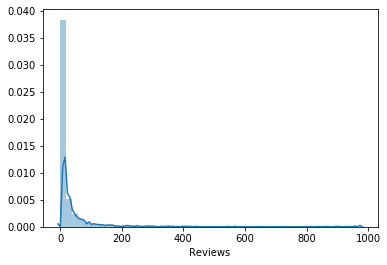

In [0]:
sns.distplot(train['Reviews'])

In [0]:
train.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Edition_Date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,10 Mar 2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,7 Nov 2012
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,25 Feb 1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,5 Oct 2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,10 Oct 2006


In [0]:
train['Released_year'] = train['Edition_Date'].apply(lambda x : x[-4:] if re.match('\d\d\d\d',x[-4:])\
                                                 else -1).astype('int')
train['Book_Age'] =2019- train['Released_year']

In [0]:
test['Released_year'] = test['Edition_Date'].apply(lambda x : x[-4:] if re.match('\d\d\d\d',x[-4:])\
                                                 else -1).astype('int')
test['Book_Age'] =2019- test['Released_year']

In [0]:
train['Edition'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Product Bundle', 'Library Binding',
       '(German),Paperback', 'Leather Bound', '(French),Paperback',
       '(Spanish),Paperback'], dtype=object)

In [0]:
test['Edition'].unique()

array(['Mass Market Paperback', 'Paperback', 'Hardcover', 'Cards',
       'Sheet music', 'Flexibound', 'Spiral-bound', '(Chinese),Paperback',
       'Loose Leaf'], dtype=object)

In [0]:
# Grouping (Language), Paperback into one
train['Edition'] = ['Paperback'  if re.match('(.*),(Paperback)',s) else s for s in train['Edition']]
test['Edition'] = ['Paperback'  if re.match('(.*),(Paperback)',s) else s for s in test['Edition']]

In [0]:
test['Edition'].value_counts()

Paperback                1266
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Cards                       1
Loose Leaf                  1
Name: Edition, dtype: int64

In [0]:
considerable_editions = ['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music', 'Flexibound'] 
others = [edition for edition in train['Edition'] if edition not in considerable_editions]
train['Edition'] = train['Edition'].replace(others,value='Others')

In [0]:
considerable_editions = ['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music', 'Flexibound'] 
others = [edition for edition in test['Edition'] if edition not in considerable_editions]
test['Edition'] = test['Edition'].replace(others,value='Others')

In [0]:
train.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Edition_Date,Released_year,Book_Age
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,10 Mar 2016,2016,3
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,7 Nov 2012,2012,7
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,25 Feb 1982,1982,37
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,5 Oct 2017,2017,2
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,10 Oct 2006,2006,13


In [0]:
train.groupby('Edition')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Edition,,,,,,,,
Flexibound,15.0,713.344000,433.772450,194.0,385.955,712.0,954.50,1669.00
Hardcover,823.0,983.294168,1170.782001,51.0,385.000,569.0,1109.00,13244.67
Mass Market Paperback,155.0,343.352452,203.491171,37.0,248.000,319.0,399.00,1919.00
Others,23.0,1341.241739,2825.552496,100.0,425.000,639.0,1155.50,14100.00
Paperback,5197.0,495.272721,530.826557,25.0,239.000,354.0,550.00,9984.00
Sheet music,24.0,799.208333,304.515293,472.0,567.000,657.0,1056.75,1431.00


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
train['Edition']=le.fit_transform(train['Edition']).astype(float)
test['Edition']=le.fit_transform(test['Edition']).astype(float)

In [0]:
train['Edition'].unique()

array([4., 1., 2., 5., 0., 3.])

In [0]:
test['Edition'].unique()

array([2., 4., 1., 3., 5., 0.])

In [0]:
print(train['Genre'].value_counts())
print(test['Genre'].value_counts())

Action & Adventure (Books)               947
Romance (Books)                          419
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Physician & Patient                        1
Sailing (Books)                            1
Archery (Books)                            1
Sign Language Reference                    1
Encyclopedias for Children                 1
Name: Genre, Length: 345, dtype: int64
Action & Adventure (Books)               236
Romance (Books)                           98
Biographies & Autobiographies (Books)     90
Contemporary Fiction (Books)              69
Crime, Thriller & Mystery (Books)         59
                                        ... 
C# Programming                             1
Children's Sport (Books)                   1
Forensic Medicine                          1
International Entrance Exams               1
Motorcycle Racin

In [0]:
train['Genre']=le.fit_transform(train['Genre']).astype(float)
test['Genre']=le.fit_transform(test['Genre']).astype(float)

In [0]:
print(train['BookCategory'].value_counts())
print(test['BookCategory'].value_counts())

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64
Action & Adventure                      218
Comics & Mangas                         161
Crime, Thriller & Mystery               155
Sports                                  143
Romance                                 142
Language, Linguistics & Writing         139
Computing, Internet & Digital Media     138
Biographies, Diaries & True Accounts    136
Humour                                  130
Arts, Film & Photography                121
Politics                                 77

In [0]:
train['BookCategory']=le.fit_transform(train['BookCategory']).astype(float)
test['BookCategory']=le.fit_transform(test['BookCategory']).astype(float)

In [0]:
print(train['BookCategory'].unique())
print(test['BookCategory'].unique())

[ 0.  2.  6.  5.  1. 10.  7.  4.  9.  3.  8.]
[ 5.  4.  9.  7.  1.  8.  0.  6. 10.  2.  3.]


In [0]:
test.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Edition_Date,Released_year,Book_Age
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,2.0,4.4,960.0,A collection of entire body of work of the She...,189.0,5.0,1 Oct 1986,1986,33
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,4.0,5.0,1.0,Enhance your software deployment workflow usin...,163.0,4.0,"Import, 26 Apr 2018",2018,1
2,Big Girl,Danielle Steel,4.0,5.0,4.0,"'Watch out, world. Here I come!'\nFor Victoria...",185.0,9.0,17 Mar 2011,2011,8
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,4.0,4.1,11.0,"If you want to learn how to program, working w...",174.0,4.0,2016,2016,3
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,4.0,4.4,9.0,"Learn and practise the verbs, prepositions and...",143.0,7.0,26 Dec 2011,2011,8


In [0]:
train['Author'].unique()

array(['Chris Kuzneski', 'Arun Khopkar', 'Thomas Hobbes', ...,
       'Saba Naqvi', 'Tom Phillips', 'Stephenie Meyer'], dtype=object)

In [0]:
test['Author'].unique()

array(['Sir Arthur Conan Doyle', 'Gabriel N. Schenker', 'Danielle Steel',
       ..., 'ARUN SAGAR', 'Khaled Hosseini', 'Heinz Guderian'],
      dtype=object)

In [0]:
#Feature Selection
train = train[[ 'Edition', 'Reviews', 'Ratings','Genre',
               'BookCategory', 'Released_year',	'Book_Age','Price']]

test = test[['Edition', 'Reviews', 'Ratings','Genre',
               'BookCategory','Released_year','Book_Age']]

In [0]:
train.head()

,Edition,Reviews,Ratings,Genre,BookCategory,Released_year,Book_Age,Price
0,4.0,8.0,4.0,1.0,0.0,2016,3,220.00
1,4.0,14.0,3.9,74.0,2.0,2012,7,202.93
2,4.0,6.0,4.8,193.0,6.0,1982,37,299.00
3,4.0,13.0,4.1,92.0,5.0,2017,2,180.00
4,1.0,1.0,5.0,253.0,1.0,2006,13,965.62


In [0]:
test.head()

,Edition,Reviews,Ratings,Genre,BookCategory,Released_year,Book_Age
0,2.0,960.0,4.4,189.0,5.0,1986,33
1,4.0,1.0,5.0,163.0,4.0,2018,1
2,4.0,4.0,5.0,185.0,9.0,2011,8
3,4.0,11.0,4.1,174.0,4.0,2016,3
4,4.0,9.0,4.4,143.0,7.0,2011,8


In [0]:
X = train.drop('Price',axis=1)
y = train['Price']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.1)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

[03:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgb =xgb.predict(X_test)

In [0]:
y_pred_xgb

array([ 419.5885 ,  733.2829 ,  718.1612 ,  527.2784 ,  402.66644,
        443.36984,  414.9382 ,  383.79538,  482.4677 ,  243.74919,
        515.4904 ,  914.2876 ,  385.87726,  522.0911 ,  819.4143 ,
        962.02856,  648.3364 , 1546.033  ,  384.55087,  232.61522,
        562.2726 ,  456.9415 ,  590.8856 ,  653.20874,  276.81052,
        934.35004,  813.583  , 1123.3342 ,  290.37497,  393.7793 ,
        382.36282,  464.10873,  733.46716,  411.04138,  234.45805,
        278.706  , 1577.3558 ,  283.02872,  791.0893 ,  297.98608,
        686.48596,  325.87924,  340.42664,  331.02472, 1571.0355 ,
        855.27106,  592.2219 ,  287.4112 ,  350.86768,  712.76434,
        340.43195,  673.28394,  384.30807,  855.7891 ,  643.96564,
        567.24854,  764.06195, 1079.9044 , 1586.9185 ,  581.94855,
        348.15137, 1606.0431 ,  757.82153,  585.1665 ,  473.44388,
        880.16327,  526.767  ,  659.5264 ,  586.14954,  370.35684,
       1158.4985 , 1968.7955 ,  380.60486,  796.79785,  369.27

In [0]:
solution = pd.DataFrame(y_pred_xgb, columns = ['Price'])
solution.to_excel('Predict_Book_Price_Soln.xlsx', index = False)

In [0]:
solution

,Price
0,419.588501
1,733.282898
2,718.161194
3,527.278381
4,402.666443
...,...
619,631.400757
620,239.434662
621,245.383774
622,272.032623
